In [ ]:
import numpy as np
import pandas as pd

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data_route = '/content/gdrive/MyDrive/final_data.csv'

In [ ]:
accident = pd.read_csv(data_route, encoding='euc-kr') #euc-kr
accident

,report_time,report_time_simple,발생장소,사고원인,지점코드,지점,지점명,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),적설(cm),지면온도(°C)
0,2010-01-01 5:40,2010-01-01 5:00,전라남도 진도군 진도읍 남동리,일반조난,진도,175,진도(첨찰산),-5.6,0.0,5.9,92.0,-6.6,962.6,1.6,0.2
1,2010-01-01 5:40,2010-01-01 5:00,전라남도 진도군 진도읍 남동리,일반조난,진도,175,진도(첨찰산),-5.6,0.0,5.9,92.0,-6.6,962.6,1.6,0.2
2,2010-01-01 7:14,2010-01-01 7:00,경상북도 문경시 문경읍 상초리,일반조난,문경,273,문경,-9.9,0.0,4.3,30.0,-24.2,1000.5,0.0,-10.3
3,2010-01-01 7:31,2010-01-01 7:00,충청북도 청주시 흥덕구 산남동,개인질환,청주,131,청주,-11.4,0.0,0.6,69.0,-15.9,1016.4,0.0,-8.7
4,2010-01-01 7:47,2010-01-01 7:00,강원도 태백시 혈동 혈동,산악기타,태백,216,태백,-12.2,0.0,2.2,29.0,-26.6,930.0,0.0,-12.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86123,2021-12-31 5:14,2021-12-31 5:00,대구광역시 남구 봉덕동 봉덕동,일반조난,대구,143,대구,-4.4,0.0,5.2,41.0,-15.7,1020.7,0.0,-3.7
86124,2021-12-31 10:22,2021-12-31 10:00,광주광역시 서구 화정동 화정동,산악기타,광주,156,광주,-0.9,0.0,1.7,61.0,-7.4,1023.8,0.8,0.4
86125,2021-12-31 14:32,2021-12-31 14:00,서울특별시 은평구 진관동 진관동,실족추락,서울,108,서울,-4.3,0.0,3.5,29.0,-19.7,1020.5,0.0,4.4
86126,2021-12-31 14:58,2021-12-31 14:00,서울특별시 은평구 진관동 진관동,실족추락,서울,108,서울,-4.3,0.0,3.5,29.0,-19.7,1020.5,0.0,4.4


In [ ]:
accident = accident[accident['사고원인'] != '암벽등반']

In [ ]:
target = pd.DataFrame(accident['사고원인'])

In [ ]:
target

,사고원인
0,일반조난
1,일반조난
2,일반조난
3,개인질환
4,산악기타
...,...
86123,일반조난
86124,산악기타
86125,실족추락
86126,실족추락


In [ ]:
column_list = accident.columns.to_list()
column_list = column_list[7:23]

In [ ]:
accident[column_list]

,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),현지기압(hPa),적설(cm),지면온도(°C)
0,-5.6,0.0,5.9,92.0,-6.6,962.6,1.6,0.2
1,-5.6,0.0,5.9,92.0,-6.6,962.6,1.6,0.2
2,-9.9,0.0,4.3,30.0,-24.2,1000.5,0.0,-10.3
3,-11.4,0.0,0.6,69.0,-15.9,1016.4,0.0,-8.7
4,-12.2,0.0,2.2,29.0,-26.6,930.0,0.0,-12.6
...,...,...,...,...,...,...,...,...
86123,-4.4,0.0,5.2,41.0,-15.7,1020.7,0.0,-3.7
86124,-0.9,0.0,1.7,61.0,-7.4,1023.8,0.8,0.4
86125,-4.3,0.0,3.5,29.0,-19.7,1020.5,0.0,4.4
86126,-4.3,0.0,3.5,29.0,-19.7,1020.5,0.0,4.4


In [ ]:
num_of_falls = len(accident[accident['사고원인'] == '암벽등반'])

# 결과를 출력합니다.
print(num_of_falls)

0


In [ ]:
df = accident[['기온(°C)', '강수량(mm)','풍속(m/s)','습도(%)', '이슬점온도(°C)', '적설(cm)','지면온도(°C)']]
df.loc[df['강수량(mm)']==0.0, 'rain'] = 0
df.loc[df['강수량(mm)']>0.0, 'rain'] = 1
df.loc[df['적설(cm)']==0.0, 'snow'] = 0
df.loc[df['적설(cm)']>0.0, 'snow'] = 1

df

<ipython-input-10-40f3ae9c1bac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['강수량(mm)']==0.0, 'rain'] = 0
<ipython-input-10-40f3ae9c1bac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['적설(cm)']==0.0, 'snow'] = 0


,기온(°C),강수량(mm),풍속(m/s),습도(%),이슬점온도(°C),적설(cm),지면온도(°C),rain,snow
0,-5.6,0.0,5.9,92.0,-6.6,1.6,0.2,0.0,1.0
1,-5.6,0.0,5.9,92.0,-6.6,1.6,0.2,0.0,1.0
2,-9.9,0.0,4.3,30.0,-24.2,0.0,-10.3,0.0,0.0
3,-11.4,0.0,0.6,69.0,-15.9,0.0,-8.7,0.0,0.0
4,-12.2,0.0,2.2,29.0,-26.6,0.0,-12.6,0.0,0.0
...,...,...,...,...,...,...,...,...,...
86123,-4.4,0.0,5.2,41.0,-15.7,0.0,-3.7,0.0,0.0
86124,-0.9,0.0,1.7,61.0,-7.4,0.8,0.4,0.0,1.0
86125,-4.3,0.0,3.5,29.0,-19.7,0.0,4.4,0.0,0.0
86126,-4.3,0.0,3.5,29.0,-19.7,0.0,4.4,0.0,0.0


In [ ]:
import scipy.stats as stats

for item in df:
  for item2 in df:
    if stats.pearsonr(df[item],df[item2]).statistic > 0.5:
      print(item,"+",item2,"=",stats.pearsonr(df[item],df[item2]))

기온(°C) + 기온(°C) = PearsonRResult(statistic=0.9999999999999989, pvalue=0.0)
기온(°C) + 이슬점온도(°C) = PearsonRResult(statistic=0.8426935216577898, pvalue=0.0)
기온(°C) + 지면온도(°C) = PearsonRResult(statistic=0.8935430370526013, pvalue=0.0)
강수량(mm) + 강수량(mm) = PearsonRResult(statistic=1.0, pvalue=0.0)
풍속(m/s) + 풍속(m/s) = PearsonRResult(statistic=1.0, pvalue=0.0)
습도(%) + 습도(%) = PearsonRResult(statistic=0.999999999999997, pvalue=0.0)
습도(%) + 이슬점온도(°C) = PearsonRResult(statistic=0.6188444224275995, pvalue=0.0)
이슬점온도(°C) + 기온(°C) = PearsonRResult(statistic=0.8426935216577898, pvalue=0.0)
이슬점온도(°C) + 습도(%) = PearsonRResult(statistic=0.6188444224275995, pvalue=0.0)
이슬점온도(°C) + 이슬점온도(°C) = PearsonRResult(statistic=1.0, pvalue=0.0)
이슬점온도(°C) + 지면온도(°C) = PearsonRResult(statistic=0.6710262926378658, pvalue=0.0)
적설(cm) + 적설(cm) = PearsonRResult(statistic=0.9999999999999947, pvalue=0.0)
적설(cm) + snow = PearsonRResult(statistic=0.662588370763118, pvalue=0.0)
지면온도(°C) + 기온(°C) = PearsonRResult(statistic=0.89

In [ ]:
target.replace({'개인(급.만성)질환':1}, inplace= True)
target.replace({'개인질환':1}, inplace= True)
target.replace({'고온환경질환':0}, inplace= True)
target.replace({'기타산악':1}, inplace= True)
target.replace({'낙석·낙빙':0}, inplace= True)
target.replace({'산악기타':1}, inplace= True)
target.replace({'실족추락':0}, inplace= True)
target.replace({'암벽등반':1}, inplace= True)
target.replace({'야생식물 섭취 중독':1}, inplace= True)
target.replace({'일반조난':1}, inplace= True)
target.replace({'저체온증':0}, inplace= True)
target.replace({'탈진·탈수':0}, inplace= True)
target.replace({'자살기도':1}, inplace= True)

In [ ]:
#target.replace({'실족추락':0}, inplace= True)
#target.replace({'산악기타':1}, inplace= True)
#target.replace({'일반조난':1}, inplace= True)
#target.replace({'개인질환':1}, inplace= True)

In [ ]:
target

,사고원인
0,1
1,1
2,1
3,1
4,1
...,...
86123,1
86124,1
86125,0
86126,0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, target, test_size = 0.25, stratify = target)
X_train.shape

(64362, 9)

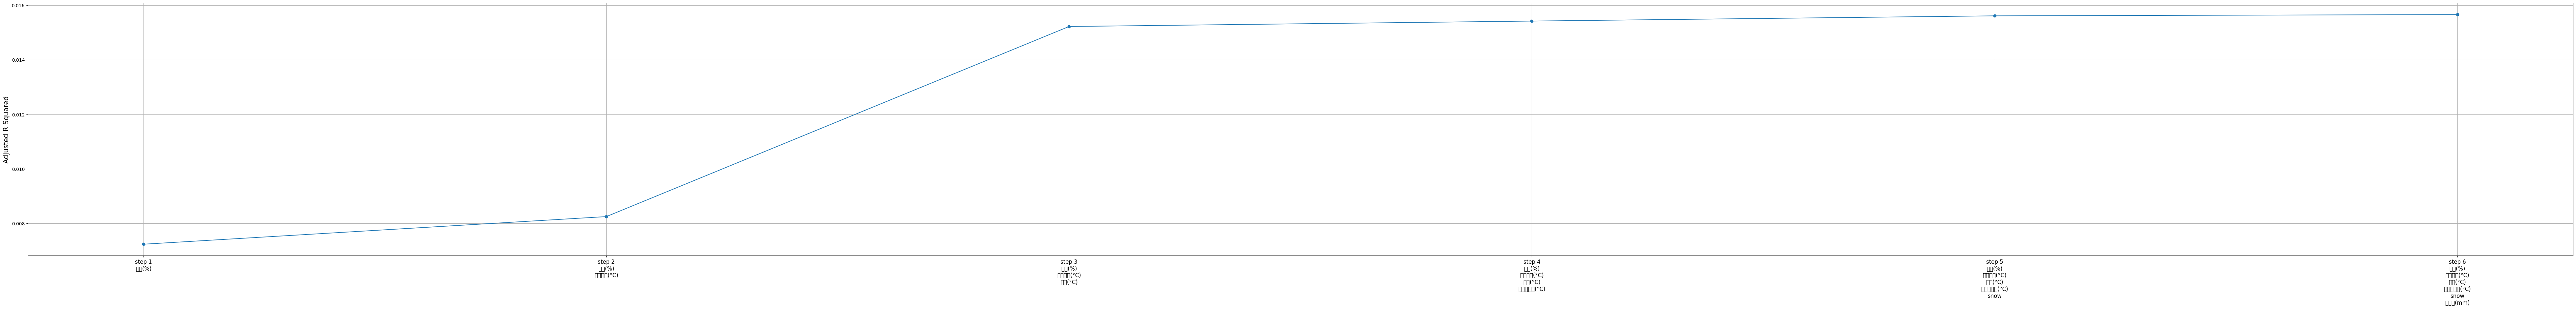

In [ ]:
def stepwise_feature_selection(X_train, y_train, variables=X_train.columns.tolist() ):
    import statsmodels.api as sm
    import matplotlib.pyplot as plt
    import warnings
    warnings.filterwarnings("ignore")
    
    y = y_train ## 반응 변수

    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05
    
    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = X_train[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit(disp=0)
            pval[col] = model.pvalues[col]
    
        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = X_train[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit(disp=0).pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break
            
            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(X_train[selected_variables])).fit(disp=0).rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(100,10))
    fig.set_facecolor('white')
    
    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=12)
    plt.plot(steps,adjusted_r_squared, marker='o')
      
    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables
    

selected_variables = stepwise_feature_selection(X_train, y_train)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
knn.predict(X_test)
knn.score(X_test, y_test)

0.7542763924493125

In [ ]:
import tensorflow as tf
X_trainND = X_train.values
y_trainND = y_train.values
X_testND, y_testND = X_test.values, y_test.values
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense 
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import minmax_scale

X_scaled_train, y_scaled_train = minmax_scale(X_train), minmax_scale(y_train)
X_scaled_test, y_scaled_test = minmax_scale(X_test), minmax_scale(y_test)

In [ ]:
def create_model():
    model = Sequential()
    model.add(Dense(512, activation=tf.nn.relu))
    model.add(Dropout(0,6))
    model.add(Dense(256, activation=tf.nn.relu))
    model.add(Dropout(0,4))
    model.add(Dense(128, activation=tf.nn.relu))
    model.add(Dropout(0,2))
    model.add(Dense(2,activation = tf.nn.softmax))
    model.compile(loss = "sparse_categorical_crossentropy", optimizer="adam",metrics=['accuracy'])
    return model

In [ ]:
model1 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.BatchNormalization(axis=1),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])

In [ ]:
model1.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy']
              )

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Dense(256, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(2, activation=tf.nn.softmax)
])
model2.compile(optimizer='adam',
             loss = 'sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model2.fit(X_trainND, y_trainND, epochs=5, shuffle = True)

Epoch 1/5
2012/2012 [==============================] - 21s 9ms/step - loss: 0.5570 - accuracy: 0.7651
Epoch 2/5
2012/2012 [==============================] - 18s 9ms/step - loss: 0.5199 - accuracy: 0.7840
Epoch 3/5
2012/2012 [==============================] - 18s 9ms/step - loss: 0.5174 - accuracy: 0.7842
Epoch 4/5
2012/2012 [==============================] - 20s 10ms/step - loss: 0.5168 - accuracy: 0.7843
Epoch 5/5
2012/2012 [==============================] - 22s 11ms/step - loss: 0.5160 - accuracy: 0.7844


In [ ]:
model2.evaluate(X_testND, y_testND)

671/671 [==============================] - 3s 4ms/step - loss: 0.5254 - accuracy: 0.7844


[0.5253693461418152, 0.7843859195709229]

In [ ]:
print(model2)

In [ ]:
model2.save('/content/gdrive/MyDrive/my_model.h5')

In [ ]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/gdrive/MyDrive/my_model.h5')
model.evaluate(X_testND, y_testND)

671/671 [==============================] - 2s 3ms/step - loss: 0.5254 - accuracy: 0.7844


[0.5253693461418152, 0.7843859195709229]

In [ ]:
print(X_testND)

[[28.8  0.   1.3 ... 28.4  0.   0. ]
 [23.6  0.   2.9 ... 31.1  0.   0. ]
 [22.1  0.   0.9 ... 25.7  0.   0. ]
 ...
 [ 3.5  0.   1.4 ...  2.5  0.   0. ]
 [22.9  0.   3.5 ... 28.6  0.   0. ]
 [23.1  0.   2.5 ... 23.1  0.   0. ]]


In [ ]:
X_data = df.values

In [ ]:
y_pred = model2.predict(X_testND)
y_prob = tf.nn.softmax(y_pred)

predict_probability = pd.DataFrame(y_prob, columns=['날씨 관련 사고', '날씨 관련 아닌 사고'])
predict_probability

671/671 [==============================] - 2s 2ms/step


,날씨 관련 사고,날씨 관련 아닌 사고
0,0.300822,0.699178
1,0.386073,0.613927
2,0.297854,0.702146
3,0.392885,0.607115
4,0.325270,0.674730
...,...,...
21450,0.362528,0.637472
21451,0.354388,0.645612
21452,0.388810,0.611190
21453,0.328667,0.671333


In [ ]:
num_of_falls = len(predict_probability[predict_probability['날씨 관련 사고'] > predict_probability['날씨 관련 아닌 사고']])

# 결과를 출력합니다.
print(num_of_falls)

# 0.3이하 465
# 0.4이상 3717

0


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, r2_score

svm_model = SVC(kernel='poly', C=1)
svm_model.fit(X_trainND, y_trainND)

preds2 = svm_model.predict(X_testND)

accuracy = accuracy_score(y_testND, preds2)

print("SVM:",accuracy)

SVM: 0.7843859240270333
